**IMPORT LIBRARY**

Importing all required libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, load_img
import zipfile

In [ ]:
# Check the version for each library
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

print("matplotlib version:", matplotlib.__version__)
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("tensorflow version:", tf.__version__)


matplotlib version: 3.8.0
numpy version: 1.26.4
pandas version: 2.2.2
seaborn version: 0.13.2
tensorflow version: 2.17.1


DELETING THE DEFAULT FOLDERS WHEN CONNECTING TO GOOGLE COLAB

In [ ]:
shutil.rmtree ('/content/sample_data')

**IMPORT DATASET FROM KAGGLE**

Import dataset from kaggle using kaggle API, previously you have to download your API on Kaggle first

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d dasa7753912/new-paddy-doctor-paddy-disease-classification

#!kaggle datasets download -d nirmalsankalana/rice-leaf-disease-image

!kaggle datasets download -d pankajkumar2002/random-image-sample-dataset

#!kaggle datasets download -d kwentar/blur-dataset

Dataset URL: https://www.kaggle.com/datasets/dasa7753912/new-paddy-doctor-paddy-disease-classification
License(s): unknown
100% 2.17G/2.17G [00:21<00:00, 129MB/s]
100% 2.17G/2.17G [00:21<00:00, 107MB/s]
Dataset URL: https://www.kaggle.com/datasets/pankajkumar2002/random-image-sample-dataset
License(s): unknown
 78% 33.0M/42.5M [00:00<00:00, 57.1MB/s]
100% 42.5M/42.5M [00:00<00:00, 64.1MB/s]


**EXTRACT THE DOWNLOADED DATASET**

In [ ]:
!unzip -q new-paddy-doctor-paddy-disease-classification.zip

In [ ]:
import zipfile
import os

# Extract all downloaded datasets
datasets = [
    "random-image-sample-dataset.zip"
]

for dataset in datasets:
    with zipfile.ZipFile(dataset, 'r') as zip_ref:
        zip_ref.extractall(os.path.splitext(dataset)[0])  # Create a folder based on the dataset name

**DELETING ZIP FILES**

In [ ]:
rm new-paddy-doctor-paddy-disease-classification.zip

In [ ]:
#rm blur-dataset.zip

In [ ]:
rm random-image-sample-dataset.zip

In [ ]:
#rm rice-leaf-disease-image.zip

**DELETING UNNECESSARY FOLDERS**

Because we only want to use the bacterial_leaf_blight, blast, brown_spot, normal and tungro datasets, we have to delete the datasets that are not needed

In [ ]:
# Create a list of folder names to delete.
folders_to_remove = [
    'bacterial_leaf_streak',
    'bacterial_panicle_blight',
    'dead_heart',
    'downy_mildew',
    'hispa'
]

# Delete each folder in an iterative manner
base_path = '/content/paddy-disease-classification/train_images/'
for folder in folders_to_remove:
    shutil.rmtree(base_path + folder)


Deleting the 'sample_submission.csv' and 'train.csv' files as they are not needed.

In [ ]:
!rm /content/paddy-disease-classification/sample_submission.csv

In [ ]:
!rm /content/paddy-disease-classification/train.csv

**CREATE A NON PADDY FOLDER**

create a non_paddy folder to hold non-paddy images

In [ ]:
!mkdir /content/paddy-disease-classification/train_images/non_paddy

**COPYING NON-PADY IMAGES FROM THE blur-dataset FOLDER CONTAINING blur_dataset_scaled, defocused_blurred, motion_blurred, sharp AND FROM THE random-image-sample-dataset FOLDER CONTAINING the data TO THE non_paddy FOLDER**

In [ ]:
!cp /content/random-image-sample-dataset/data/* /content/paddy-disease-classification/train_images/non_paddy

In [ ]:
#!cp /content/blur-dataset/sharp/* /content/paddy-disease-classification/train_images/non_paddy

In [ ]:
#!cp /content/blur-dataset/motion_blurred/* /content/paddy-disease-classification/train_images/non_paddy

In [ ]:
#!cp /content/blur-dataset/defocused_blurred/* /content/paddy-disease-classification/train_images/non_paddy

**COPYING IMAGES FROM THE rice-leaf-disease-image FOLDER CONTAINING RICE DISEASE IMAGES INTO THE paddy-disease-classification/train_images FOLDER TO INCREASE THE DATA**

In [ ]:
#!cp /content/rice-leaf-disease-image/Bacterialblight/* /content/paddy-disease-classification/train_images/bacterial_leaf_blight

In [ ]:
#!cp /content/rice-leaf-disease-image/Blast/* /content/paddy-disease-classification/train_images/blast

In [ ]:
#!cp /content/rice-leaf-disease-image/Brownspot/* /content/paddy-disease-classification/train_images/brown_spot

In [ ]:
#!cp /content/rice-leaf-disease-image/Tungro/* /content/paddy-disease-classification/train_images/tungro

**DELETING THE rice-leaf-disease-image, blur-dataset AND random-image-sample-dataset FOLDERS BECAUSE THE FILES IN THEM HAVE BEEN COPIED**

In [ ]:
#shutil.rmtree('/content/blur-dataset')

In [ ]:
shutil.rmtree('/content/random-image-sample-dataset')

In [ ]:
#shutil.rmtree('/content/rice-leaf-disease-image')

**Menghapus file dalam folder non_paddy**

In [ ]:
"""
import os
import random

# Tentukan direktori folder
folder_path = '/content/paddy-disease-classification/train_images/non_paddy'

# Ambil semua nama file di dalam folder
files = os.listdir(folder_path)

# Pilih 2550 file secara acak dari 4150 file
files_to_delete = random.sample(files, 2150)

# Hapus file-file tersebut
for file in files_to_delete:
    file_path = os.path.join(folder_path, file)
    os.remove(file_path)

print(f"{len(files_to_delete)} files have been deleted.")
"""

2150 files have been deleted.


**SPLITTING DATASET FOR MODEL VALIDATION**

Because in the dataset there is no folder for image validation, therefore we have to create one for image validation

In [ ]:
dataset_path = "/content/paddy-disease-classification"
train_dir = os.path.join(dataset_path, "train_images")

In [ ]:
validation_dir = os.path.join(dataset_path, "validation_images")
os.makedirs(validation_dir, exist_ok=True)

In [ ]:
for cls in os.listdir(train_dir):
    class_path = os.path.join(train_dir, cls)
    validation_class_path = os.path.join(validation_dir, cls)
    os.makedirs(validation_class_path, exist_ok=True)
    images = os.listdir(class_path)
    np.random.shuffle(images)
    validation_count = int(0.2 * len(images)) #we use 20% (0.2) of images for validation
    for img in images[:validation_count]:
        shutil.move(os.path.join(class_path, img), os.path.join(validation_class_path, img))

**Exploratory Data Analysis of the dataset**

Perform Exploratory Data Analysis on the dataset to determine the number of files

Number of Classes: 6
Name of Classes: ['blast', 'non_paddy', 'brown_spot', 'tungro', 'normal', 'bacterial_leaf_blight']


<ipython-input-20-836db0a60cd9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.values()), y=list(class_counts.keys()), palette=colors)


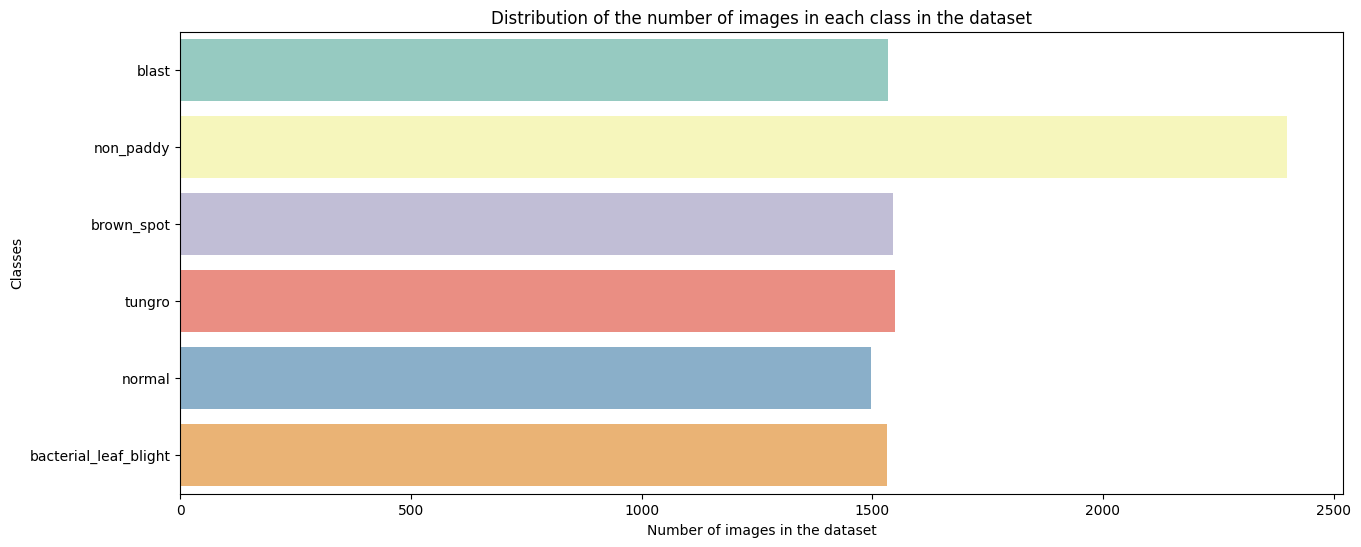

In [ ]:
def perform_eda_on_dataset(train_dir):
    classes = os.listdir(train_dir)
    print(f"Number of Classes: {len(classes)}")
    print(f"Name of Classes: {classes}")

    class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes}
    colors = sns.color_palette("Set3", len(classes))

    plt.figure(figsize=(15, 6))
    sns.barplot(x=list(class_counts.values()), y=list(class_counts.keys()), palette=colors)
    plt.xticks()
    plt.title("Distribution of the number of images in each class in the dataset")
    plt.xlabel("Number of images in the dataset")
    plt.ylabel("Classes")
    plt.show()

perform_eda_on_dataset(train_dir)

**IMAGE AUGMENTATION**

"Image augmentation" is performed to increase the variety of images to be trained and validated

In [ ]:
train_datagenerator = ImageDataGenerator( rescale=1.0/255,
                                          rotation_range=30,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

val_datagenerator = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagenerator.flow_from_directory(train_dir,
                                                          target_size=(224, 224),
                                                          batch_size=64,
                                                          class_mode='categorical')

validation_generator = val_datagenerator.flow_from_directory(validation_dir,
                                                             target_size=(224, 224),
                                                             batch_size=64,
                                                             class_mode='categorical')

Found 10059 images belonging to 6 classes.
Found 2513 images belonging to 6 classes.


**CLASS WEIGHTING ON DATA**

Class weighting is done because the data distribution is uneven

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
ClassLabels = list(train_generator.class_indices.keys())
ClassWeights = compute_class_weight(  class_weight='balanced', classes=np.arange(len(ClassLabels)),
                                      y=np.concatenate([np.full(len(train_generator.filepaths[i]), i) for i in range(len(ClassLabels))])
                                    )

ClassWeightsDict = {i: ClassWeights[i] for i in range(len(ClassWeights))}
print("Class Weights In Dataset:", ClassWeightsDict)

Class Weights In Dataset: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}


**PRE TRAIN MODEL**

In [ ]:
model = tf.keras.models.Sequential([  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(229, 229, 3)), #awalnya 229, 229
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(256, activation='relu'),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(64, activation='relu'),
                                      tf.keras.layers.Dense(6, activation='softmax') #because the output is more than 2, therefore we use softmax activation
                                  ])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 227, 227, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 113, 113, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 111, 111, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 53, 53, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,277,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,887,174 (18.64 MB)

 Trainable params: 4,887,174 (18.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator, class_weight=ClassWeightsDict, verbose=1)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


158/158 ━━━━━━━━━━━━━━━━━━━━ 150s 822ms/step - accuracy: 0.3391 - loss: 1.4577 - val_accuracy: 0.4938 - val_loss: 1.2325
Epoch 2/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 126s 762ms/step - accuracy: 0.4488 - loss: 1.2241 - val_accuracy: 0.4986 - val_loss: 1.1840
Epoch 3/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 125s 760ms/step - accuracy: 0.4835 - loss: 1.1819 - val_accuracy: 0.5249 - val_loss: 1.1605
Epoch 4/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 126s 761ms/step - accuracy: 0.5047 - loss: 1.1339 - val_accuracy: 0.5750 - val_loss: 1.0260
Epoch 5/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 126s 760ms/step - accuracy: 0.5441 - loss: 1.0951 - val_accuracy: 0.6049 - val_loss: 0.9737


**USING TRANSFER LEARNING (EfficientNetB2)**

In [ ]:
TransferLearning_Model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
TransferLearning_Model.trainable = True

In [ ]:
x = TransferLearning_Model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)

In [ ]:
model = Model(inputs=TransferLearning_Model.input, outputs=predictions)
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 8,162,943 (31.14 MB)

 Trainable params: 8,095,368 (30.88 MB)

 Non-trainable params: 67,575 (263.97 KB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=65,
    validation_data=validation_generator,
    class_weight=ClassWeightsDict,
    verbose=1
)

Epoch 1/65
158/158 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.2172 - loss: 1.8236 - val_accuracy: 0.2388 - val_loss: 1.7770
Epoch 2/65
158/158 ━━━━━━━━━━━━━━━━━━━━ 127s 771ms/step - accuracy: 0.4287 - loss: 1.4359 - val_accuracy: 0.2388 - val_loss: 1.8721
Epoch 3/65
158/158 ━━━━━━━━━━━━━━━━━━━━ 127s 769ms/step - accuracy: 0.5216 - loss: 1.1754 - val_accuracy: 0.2396 - val_loss: 2.1680
Epoch 4/65
158/158 ━━━━━━━━━━━━━━━━━━━━ 128s 777ms/step - accuracy: 0.5970 - loss: 1.0168 - val_accuracy: 0.3060 - val_loss: 1.5358
Epoch 5/65
158/158 ━━━━━━━━━━━━━━━━━━━━ 127s 770ms/step - accuracy: 0.6454 - loss: 0.9069 - val_accuracy: 0.6311 - val_loss: 0.9583
Epoch 6/65
158/158 ━━━━━━━━━━━━━━━━━━━━ 128s 775ms/step - accuracy: 0.6834 - loss: 0.7980 - val_accuracy: 0.7684 - val_loss: 0.6382
Epoch 7/65
158/158 ━━━━━━━━━━━━━━━━━━━━ 127s 770ms/step - accuracy: 0.7385 - loss: 0.6972 - val_accuracy: 0.8249 - val_loss: 0.5114
Epoch 8/65
158/158 ━━━━━━━━━━━━━━━━━━━━ 127s 772ms/step - accuracy: 0.7655 - lo

**PLOT FOR ACCURACY AND LOSS**

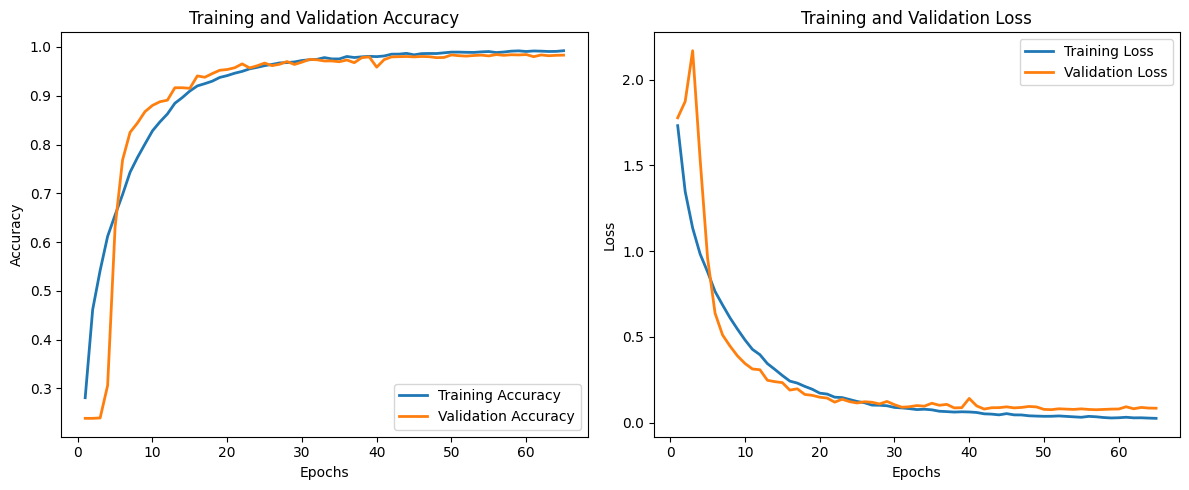

In [ ]:
import matplotlib.pyplot as plt

def PlotTrainingHistory(history):
    acc = history.history['accuracy']
    ValidationAccuracy = history.history['val_accuracy']
    loss = history.history['loss']
    ValidationLoss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy', linewidth=2)
    plt.plot(epochs, ValidationAccuracy, label='Validation Accuracy', linewidth=2)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss', linewidth=2)
    plt.plot(epochs, ValidationLoss, label='Validation Loss', linewidth=2)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

PlotTrainingHistory(history)


**USING FINE TUNING**

In [ ]:
TransferLearning_Model.trainable = True

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_fine = model.fit( train_generator,
                          epochs=10,
                          validation_data=validation_generator,
                          class_weight=ClassWeightsDict,
                          verbose=1
                        )

Epoch 1/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.9904 - loss: 0.0318 - val_accuracy: 0.9841 - val_loss: 0.0823
Epoch 2/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 127s 771ms/step - accuracy: 0.9934 - loss: 0.0232 - val_accuracy: 0.9841 - val_loss: 0.0823
Epoch 3/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 128s 772ms/step - accuracy: 0.9900 - loss: 0.0272 - val_accuracy: 0.9845 - val_loss: 0.0806
Epoch 4/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 128s 775ms/step - accuracy: 0.9926 - loss: 0.0255 - val_accuracy: 0.9841 - val_loss: 0.0817
Epoch 5/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 128s 773ms/step - accuracy: 0.9918 - loss: 0.0240 - val_accuracy: 0.9841 - val_loss: 0.0829
Epoch 6/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 127s 769ms/step - accuracy: 0.9910 - loss: 0.0244 - val_accuracy: 0.9841 - val_loss: 0.0812
Epoch 7/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 127s 772ms/step - accuracy: 0.9913 - loss: 0.0251 - val_accuracy: 0.9845 - val_loss: 0.0809
Epoch 8/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 127s 771ms/step - accuracy: 0.9927 - lo

**TESTING**

Saving 107705.jpg to 107705.jpg


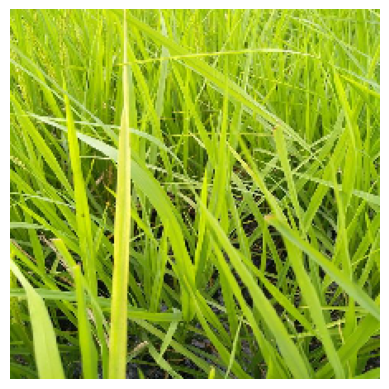

Prediction probabilities:
bacterial_leaf_blight: 0.00%
blast: 0.00%
brown_spot: 100.00%
non_paddy: 0.00%
normal: 0.00%
tungro: 0.00%

Result:
brown_spot: 100.00%


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
labels = list(train_generator.class_indices.keys())

uploaded = files.upload()

for filepath in uploaded.keys():
    img = image.load_img(filepath, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    proba = model.predict(x, verbose=0)[0]

    print("Prediction probabilities:")
    for label, probability in zip(labels, proba):
        print(f"{label}: {probability * 100:.2f}%")

    MaxIndex = np.argmax(proba)
    MaxLabel = labels[MaxIndex]
    MaxProbability = proba[MaxIndex]

    print("\nResult:")
    if MaxProbability >= 0.5:
        print(f"{MaxLabel}: {MaxProbability * 100:.2f}%")
    else:
        print("Hasil tidak ditemukan!")


**CONFUSSION MATRIX**

Found 2513 images belonging to 6 classes.
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 373ms/step


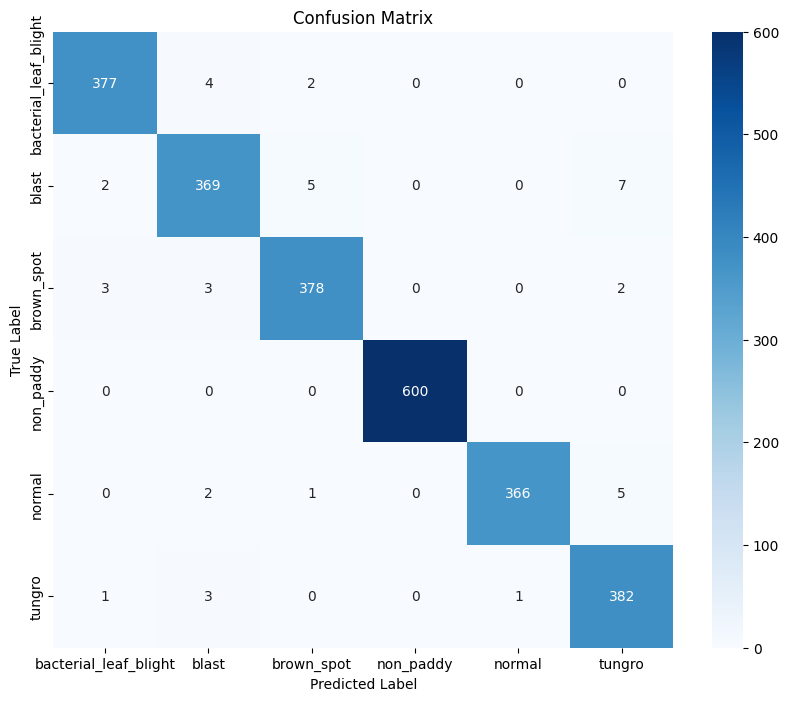

Classification Report:
                       precision    recall  f1-score   support

bacterial_leaf_blight       0.98      0.98      0.98       383
                blast       0.97      0.96      0.97       383
           brown_spot       0.98      0.98      0.98       386
            non_paddy       1.00      1.00      1.00       600
               normal       1.00      0.98      0.99       374
               tungro       0.96      0.99      0.98       387

             accuracy                           0.98      2513
            macro avg       0.98      0.98      0.98      2513
         weighted avg       0.98      0.98      0.98      2513



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Y_pred = model.predict(test_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report:")
print(classification_report(true_classes, y_pred, target_names=class_labels))


**SAVE THE MODEL**

In [ ]:
model.save('model_RIPAD_FIX.h5')

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/model_RIPAD_FIX.h5')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open('converted_model_RIPAD_FIX.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp1udplvbo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  138610379901056: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  138610379902112: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  138610379909680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138610379908800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138610379903168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138610379904048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138610379908096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138610379913728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138610379913200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138610379911616: TensorSpec(shape=(), dtype=tf.resource, name=Non